In [1]:
from sklearn.datasets import make_regression
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

Coefficients: [49.82930935]
Intercept: 3.4953459615809184


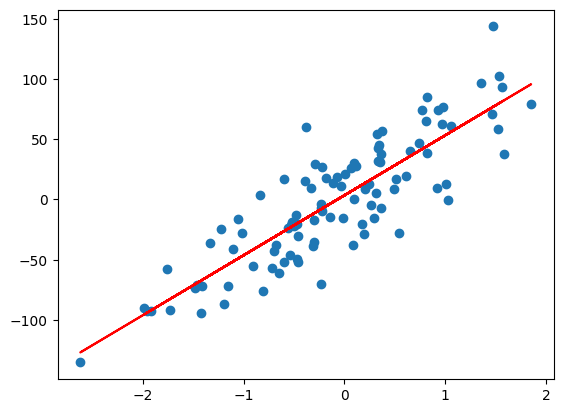

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=30, random_state=42)

# Apply OLS
ols = LinearRegression()
ols.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
print(f'Coefficients: {ols.coef_}')
print(f'Intercept: {ols.intercept_}')

# Draw Regression line in the plot before
fig, ax= plt.subplots()

ax.scatter(X, y) 
ax.plot(X, ols.predict(X), color='red')
fig.show()

In [3]:
print(X.ravel().shape)

(100,)


Epoch 0: b = 0.06988758436629615, m = 49.8128944435235
Slope Grad: 0.710555647650439, Intercept Grad: -6.988758436629615
Epoch 1: b = 0.13836265929938174, m = 49.806051608123795
Slope Grad: 0.6842835399704866, Intercept Grad: -6.847507493308559
Epoch 2: b = 0.20545402064129842, m = 49.799464213101174
Slope Grad: 0.6587395022621226, Intercept Grad: -6.7091361341916675
Epoch 3: b = 0.27118987319574084, m = 49.79312515803025
Slope Grad: 0.6339055070921237, Intercept Grad: -6.573585255444239
Epoch 4: b = 0.3355978429232407, m = 49.78702751854959
Slope Grad: 0.6097639480659898, Intercept Grad: -6.440796972749983
Epoch 5: b = 0.3987049888837027, m = 49.78116454224631
Slope Grad: 0.5862976303285574, Intercept Grad: -6.3107145960462026
Epoch 6: b = 0.4605378149315422, m = 49.775529644633565
Slope Grad: 0.5634897612741863, Intercept Grad: -6.183282604783952
Epoch 7: b = 0.5211222811685658, m = 49.77011640521894
Slope Grad: 0.5413239414621229, Intercept Grad: -6.058446623702366
Epoch 8: b = 0.58

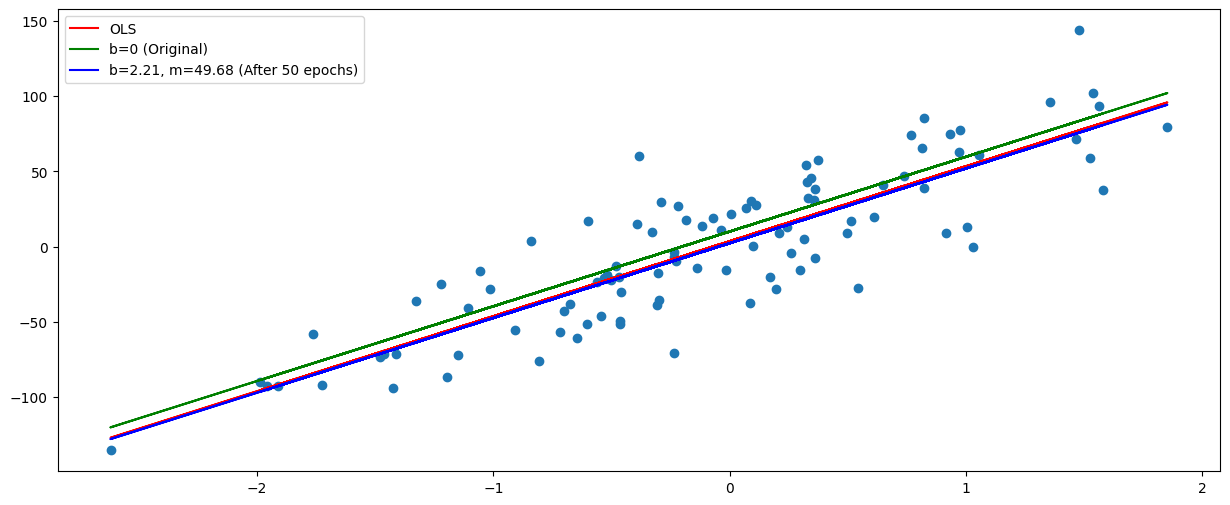

In [14]:
# Apply Gradient Descent
m = 49.82
b = 0 # Starting the intercept from 0

learning_rate = 0.01
epochs = 50
for i in range(epochs):
    # Calculate the slope and intercept gradients
    slope_grad = -2 * np.sum(X.ravel() * (y.ravel() - (m*X.ravel() + b))) / len(X)
    intercept_grad = -2 * np.sum(y.ravel() - (m*X.ravel() + b)) / len(X)
    
    m = m - learning_rate * slope_grad
    b = b - learning_rate * intercept_grad
    
    print(f'Epoch {i}: b = {b}, m = {m}')
    print(f'Slope Grad: {slope_grad}, Intercept Grad: {intercept_grad}')

random_line = m*X + 10
y_pred = m*X + b
fig, ax= plt.subplots(figsize=(15, 6))

ax.scatter(X, y) 
ax.plot(X, ols.predict(X), color='red', label = 'OLS')
ax.plot(X, random_line, color='green', label = f'b=0 (Original)')
ax.plot(X, y_pred, color='blue', label = f'b={b:.2f}, m={m:.2f} (After {epochs} epochs)')
ax.legend()
fig.show()

In [5]:
# Making same using a loop 

m = 49.82

b = -100
epochs = 500
learning_rate = -0.001

for i in range(epochs):
    error_func_slope = -2 * np.sum((y - (m*X.ravel() - b)))
    b = b - learning_rate * error_func_slope
    print(f'Epoch {i}: b = {b}')
    print(f'Slope: {error_func_slope}')

Epoch 0: b = -80.69887584366296
Slope: 19301.12415633704
Epoch 1: b = -65.25797651859332
Slope: 15440.89932506963
Epoch 2: b = -52.905257058537615
Slope: 12352.719460055705
Epoch 3: b = -43.023081490493055
Slope: 9882.175568044562
Epoch 4: b = -35.11734103605741
Slope: 7905.740454435648
Epoch 5: b = -28.79274867250889
Slope: 6324.592363548521
Epoch 6: b = -23.733074781670073
Slope: 5059.673890838815
Epoch 7: b = -19.68533566899902
Slope: 4047.7391126710527
Epoch 8: b = -16.447144378862177
Slope: 3238.1912901368423
Epoch 9: b = -13.856591346752705
Slope: 2590.553032109473
Epoch 10: b = -11.784148921065125
Slope: 2072.44242568758
Epoch 11: b = -10.126194980515061
Slope: 1657.9539405500632
Epoch 12: b = -8.79983182807501
Slope: 1326.3631524400512
Epoch 13: b = -7.73874130612297
Slope: 1061.090521952041
Epoch 14: b = -6.889868888561337
Slope: 848.8724175616325
Epoch 15: b = -6.210770954512031
Slope: 679.097934049306
Epoch 16: b = -5.667492607272587
Slope: 543.2783472394447
Epoch 17: b = -5

In [6]:
# Creating a class for gradient descent

class GradientDescent:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        m = 49.82 # Taking the slope to be constant 
        b = -100
        for i in range(self.epochs):
            slope = -2 * np.sum((y - (m*X.ravel() - b)))
            b = b - self.learning_rate * slope
        return m, b
    
gd = GradientDescent(learning_rate=-0.001, epochs=5000)
m, b = gd.train(X, y)
print(f'm = {m}')
print(f'b = {b}')
# 3.4953459615809184

m = 49.82
b = -3.494379218314809


In [ ]:
# Now m is also variable 
m_var = 3       # Choosing a random m
b_var = 10     # Choosing a random b

epochs = 1000
learning_rate_m = 0.0001
learning_rate_b = 0.001

for i in range(epochs):
    error_func_slope_b = -2 * np.sum((y - (m_var*X.ravel() - b_var)))
    error_func_slope_m = -2 * np.sum(X.ravel() * (y - (m_var*X.ravel() - b_var)))
    
    m_var = m_var - learning_rate_m * error_func_slope_m
    b_var = b_var - learning_rate_b * error_func_slope_b
    
    #print(f'Epoch {i}: m = {m_var}, b = {b_var}')   
    print(f'Slope m: {error_func_slope_m}, Slope b: {error_func_slope_b}')
    

Slope m: -1726.4570547846668, Slope b: -7468.147536233652
Slope m: -3223.6722930827937, Slope b: -7284.473137878671
Slope m: -4687.262263475657, Slope b: -7079.8404170460135
Slope m: -6112.965464128355, Slope b: -6855.241031411042
Slope m: -7496.709873898566, Slope b: -6611.716553955703
Slope m: -8834.62332893607, Slope b: -6350.3543010909825
Slope m: -10123.04308645824, Slope b: -6072.283075733834
Slope m: -11358.524557004188, Slope b: -5778.668840553996
Slope m: -12537.849189474593, Slope b: -5470.710336599491
Slope m: -13658.031496273277, Slope b: -5149.634662453357
Slope m: -14716.325208870883, Slope b: -4816.692828969332
Slope m: -15710.228557100352, Slope b: -4473.155304481857
Slope m: -16637.488668459126, Slope b: -4120.307565187073
Slope m: -17496.1050866246, Slope b: -3759.4456651479104
Slope m: -18284.332411278327, Slope b: -3391.8718400892553
Slope m: -19000.682064171924, Slope b: -3018.8901588204067
Slope m: -19643.923189145542, Slope b: -2641.802235752879
Slope m: -20213.0

### Implementing Batch Gradient Descent For Multi Columns Datasets

In [5]:
from sklearn.datasets import load_diabetes
import numpy as np 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [6]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [7]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print(f'MSE: {mean_squared_error(y_test, reg.predict(X_test))}')
print(f'R2: {r2_score(y_test, reg.predict(X_test))}')

Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995
MSE: 2900.19362849348
R2: 0.4526027629719197


In [8]:
print(X.shape)
x = np.ones(X.shape[1])
print(x.shape)

(442, 10)
(10,)


In [10]:
class GradientDescent_Multi_Regression:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X.shape[1])
        self.intercept_ = 0
        
        for i in range(self.epochs):
            y_pred = np.dot(X_train, self.coef_) + self.intercept_
            error = y_train - y_pred
            error_der = -2 * np.mean(error)
            self.intercept_ = self.intercept_ - self.learning_rate * error_der
            
            coef_der = -2 * np.dot(error, X_train)
            self.coef_ = self.coef_ - self.learning_rate * coef_der
        
        print(f'Epoch {i}: Intercept: {self.intercept_}','\n', f'Slope: {self.coef_}')      

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
    
gd = GradientDescent_Multi_Regression(learning_rate=0.08, epochs=2000)
gd.fit(X_train, y_train)     
        

Epoch 1999: Intercept: 151.34140646278425 
 Slope: [  38.36417168 -241.79451018  544.01603088  347.2041533  -849.70769119
  453.90055482  126.73808451  264.04737114  704.8548229    49.2543172 ]


### Stochastic Gradient Descent
* Faster converstion 
* Less Epochs
* Less RAM requirement 

In [13]:
class SGDRegressor:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X.shape[1])
        self.intercept_ = 0
        
        for i in range(self.epochs):
            for j in range(len(X_train)):
                idx = np.random.randint(0, len(X_train))
                y_pred = np.dot(X_train[idx], self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_pred)
                self.intercept_ = self.intercept_ - self.learning_rate * intercept_der
                
                coef_der = -2 * np.dot((y_train[idx] - y_pred), X_train[idx])
                self.coef_ = self.coef_ - self.learning_rate * coef_der
            
        print(f'Epoch {i}: Intercept: {self.intercept_}','\n', f'Slope: {self.coef_}')
           
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
    
sgd = SGDRegressor(learning_rate=0.08, epochs=267)
sgd.fit(X_train, y_train)     
        

Epoch 266: Intercept: 167.85845532321585 
 Slope: [  52.59671702 -258.53282796  570.75241563  347.45068549 -279.93623483
   30.06085874 -141.05518777  181.78133826  510.43608034   71.07358372]


### Mini-Batch Gradient Descent

In [17]:
class MiniBatchGradientDescent:
    def __init__(self, learning_rate, epochs, batch_size):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])  # corrected X to X_train
        
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0] / self.batch_size)):
                idx = np.random.choice(X_train.shape[0], self.batch_size, replace=False)  # corrected np.random.sample to np.random.choice
                X_batch = X_train[idx]
                y_batch = y_train[idx]
                
                y_pred = np.dot(X_batch, self.coef_) + self.intercept_        
                
                intercept_der = -2 * np.mean(y_batch - y_pred)
                self.intercept_ = self.intercept_ - self.learning_rate * intercept_der
                
                coef_der = -2 * np.dot((y_batch - y_pred), X_batch) / self.batch_size  # added division by batch_size
                self.coef_ = self.coef_ - self.learning_rate * coef_der
        print(f'Epoch {i}: Intercept: {self.intercept_}','\n', f'Slope: {self.coef_}')
           
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
    
mbgd = MiniBatchGradientDescent(learning_rate=0.08, epochs=2000, batch_size=10)
mbgd.fit(X_train, y_train)

Epoch 1999: Intercept: 149.52286459087279 
 Slope: [  38.43702686 -239.07332206  552.76484835  339.02103449 -244.87835039
  -18.20046965 -147.07212514  181.61943859  466.9345323    49.09886873]
